In [1]:
import os 

module_directory = os.path.dirname(os.getcwd())
# define function to find all the files of a given extension in a directory and its subfolders, 
# and return the filename if check_print is True 
def findext(extension, path, check_print): 
    l = [] 
    for root, dirs, files in os.walk(path):
        for filename in files:
            if filename.endswith(extension):
                if filename.rsplit('.')[0].rsplit('-')[1] == 'XV' : 
                    l.append(os.path.join(root,filename))
                    if check_print == True : 
                        print(os.path.splitext(filename)[0])
    return(l)

# first, let's find all the csv files to convert: 
list_csv = findext('csv',module_directory,1) 

id000002-XV
id000010-XV
id000003-XV-new
id000006-XV-new
id000010-XV-new
id000004-XV
id000008-XV
id000006-XV
id000009-XV-new
id000004-XV-new
id000007-XV-new
id000003-XV
id000002-XV-new
id000005-XV
id000009-XV
id000008-XV-new
id000005-XV-new
id000007-XV


<ipython-input-4-1371a7906c98>:38: RuntimeWarning: invalid value encountered in arccos
  om = np.arccos(np.dot(ecc, n )/rnorm/row['e'])


id000002  done
0.3074847099714676
0.20564007762226838
0.46668503678786954
0.38708487337966857


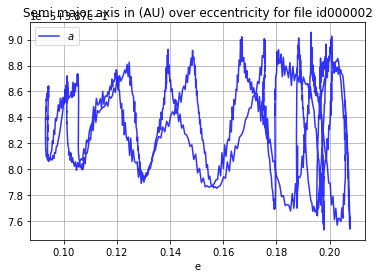

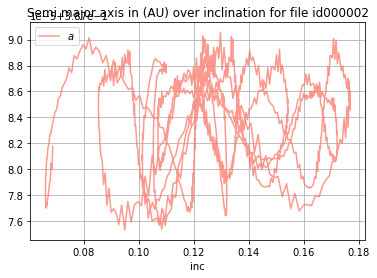

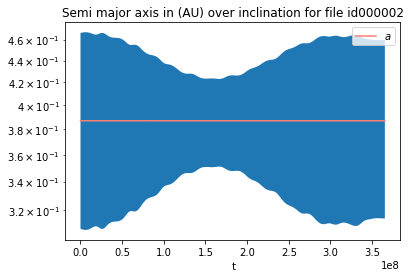

id000010  done
29.6437487857756
0.24672343359251445
49.06240007838484
39.35307443208022


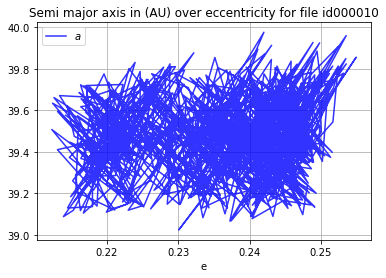

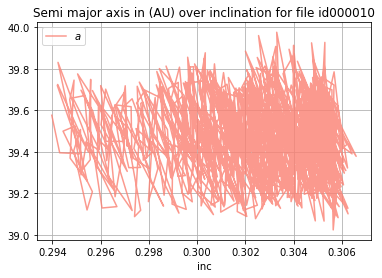

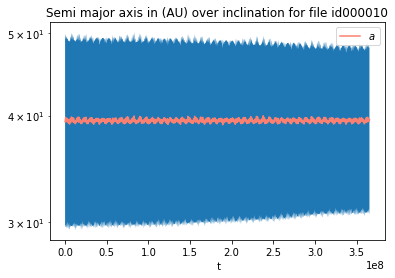

TypeError: 'float' object is not callable

In [4]:
import pandas as pd
import numpy as np
import csv

#print(module_directory)
for file in list_csv: 
    inew = 0 
    filename= file.rsplit('/')[-1].rsplit('.')[0].rsplit('-')[0]
    #print(filename)
    file_eldata = []
    data = pd.read_csv(file, header = 0 )
    command_path = module_directory + "/src/xv2el"
    data['e'] = np.nan
    data['f'] = np.nan
    data['varpi']=np.nan
    data['a'] = np.nan
    data['inc'] = np.nan
    data['long'] = np.nan
    mu = 4 * np.pi**2
    for index, row in data.iterrows():
        r = [row['xh'], row['yh'], row['zh']]
        rnorm = np.linalg.norm(r)
        v =  np.multiply([row['vxh'], row['vyh'], row['vz']],365.25)
        h = np.cross(r,v)
        ecc = np.cross(v, h)/mu  - r/rnorm
        E = 0.5*np.linalg.norm(v)**2 - mu / rnorm
        row['e'] = np.linalg.norm(ecc)
        row['a'] = - mu / 2 / E 
        if np.dot(r,v) >= 0 : 
            f = np.arccos((row['a']*(1-row['e']**2) - rnorm)/rnorm/row['e'])
        else: 
            f = 2*np.pi - np.arccos((row['a']*(1-row['e']**2) - rnorm)/rnorm/row['e'])
        row['f'] = f    
        row['inc'] = np.arccos(h[2] / np.linalg.norm(h))
        n = np.cross([0,0,1], h)
        row['long'] = np.arctan2(h[0], -h[1]) 
        if n[2] >= 0 :
            om = np.arccos(np.dot(ecc, n )/rnorm/row['e'])
        else: 
            om = 2*np.pi() - np.arccos(np.dot(ecc, n )/np.linalg.norm(n)/row['e'])
        row['varpi'] = row['long'] + om

    #out_path = module_directory + "/src/xv2el.output"
    #el_data = pd.read_csv(out_path, names = ['a','e', 'i', 'long', 'varpi', 'f'])
    data.to_csv(module_directory + '/data/'+ filename+'-EL.csv', columns=[' t','a','e','inc','long', 'varpi', 'f'], index = False)
    print(filename, " done") 
    data['rq'] = data['a'] - data['a']*data['e']
    data['rQ'] = data['a'] + data['a']*data['e']
    print(data['rq'][0])
    print(data['e'][0])
    print(data['rQ'][0])
    print(data['a'][0])
    plot_panda_ecc(data, filename)
    plot_panda_inc(data, filename)
    plot_panda_el(data, filename)

## 

In [ ]:
#import pandas as pd
#import csv

#print(module_directory)
#for file in list_csv: 
 #   inew = 0 
  #  filename= file.rsplit('/')[-1].rsplit('.')[0].rsplit('-')[0]
    #print(filename)
  #  file_eldata = []
   # data = pd.read_csv(file)
    #for index, row in data.iterrows():
     #   command_path = module_directory + "/src/xv2el"
      #  with open('eggs.csv', 'w', newline='') as csvfile:
       # if inew == 0 :
        #    #print('new'00)
         #   fortran_command = "{} -r {} {} {} -v {} {} {} -new".format(command_path, row['xh'], row['yh'] ,row['zh'],row['vxh'] ,row['vyh'] ,row['vz'])
#        else :
            #print('old')
#            fortran_command = "{} -r {} {} {} -v {} {} {}".format(command_path, row['xh'], row['yh'] ,row['zh'],row['vxh'] ,row['vyh'] ,row['vz'])
 #       print(fortran_command)
        #os.system(fortran_command)
  #      inew += 1 
   # out_path = module_directory + "/src/xv2el.output"
#    el_data = pd.read_csv(out_path, names = ['a','e', 'i', 'long', 'varpi', 'f'])
 #   el_data.insert(0, column = 't', value = data[' t'] )
  #  el_data.to_csv(module_directory + '/data/'+ filename+'-EL.csv', index=False)
   # print(filename, " done") 

In [3]:
#define the plotting routine 
import pandas as pd 
import matplotlib.pyplot as plt

def plot_panda_ecc(panda_data, filename):
    panda_data.plot(x='e', y = 'a', label = '$a$', color = 'blue', grid = True,  alpha = 0.8, title = "Semi major axis in (AU) over eccentricity for file {id:s}".format(id = filename))


    
def plot_panda_inc(panda_data, filename):
    panda_data.plot(x='inc', y = 'a', label = '$a$', color = 'salmon', grid = True,  alpha = 0.8, title = "Semi major axis in (AU) over inclination for file {id:s}".format(id = filename))

def plot_panda_el(panda_data, filename): 
    fig, ax = plt.subplots()
    panda_data.plot(x=' t', y = 'a', label = '$a$', color = 'salmon', ax = ax, logy = True )
    ax.fill_between(panda_data[' t'], panda_data['rq'], panda_data['rQ'], label = 'area between periapsis and apoapsis')
    ax.set_title("Semi major axis in (AU) over inclination for file {id:s}".format(id = filename))
    ax.set_yscale( "log" )
    plt.show()
    plt.close()

